## Problem 1: Geocode shopping centers (5 points)

The aim of problems 1-3 is to find out **how many people live within a walking distance (1.5 km) from selected shopping centers in Helsinki**.

In problem 1 the task is to find out the addresses for a list of shopping centers and to geocode these addresses in order to represent them as points. The output should be stored in a Shapefile called `shopping_centers.shp` 

**Preparation:** Find out the addresses for following shopping centers from the internet, and write the addresses into a text file called `shopping_centers.txt`:

 - Itis
 - Forum
 - Iso-omena
 - Sello
 - Jumbo
 - REDI
 - Mall of Tripla 
 

`shopping_centers.txt` should have semicolon (`;`) as a separator, and the file should include the following columns:

- ``id`` (integer) containing an unique identifier for each shopping center
- ``name`` (string) of each shopping center
- ``addr`` (string) the address 


See and example of how to format the text file [in the lesson 3 materials](https://autogis-site.readthedocs.io/en/latest/notebooks/L3/geocoding_in_geopandas.html). Save (and upload) the text file into your exercise repository.

- Read `shopping_centers.txt` that you just created into a pandas DataFrame called ``data``:

In [1]:
# Import modules
import pandas as pd
import geopandas as gpd
from geopandas.tools import geocode
# Read the data (replace "None" with your own code)
fp = r"shopping_centers.txt"
data = pd.read_csv(fp,sep=';')


# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()

In [2]:
#NON-EDITABLE TEST CELL
# Check your input data
print(data)

   id            name                                              addr
0   0            Itis            Itäkatu 1-7, 00930 Helsinki, Finlandia
1   1           Forum  Mannerheimintie 14–20, 00100 Helsinki, Finlandia
2   2       Iso-omena           Piispansilta 11, 02230 Espoo, Finlandia
3   3           Sello       Leppävaarankatu 3-9, 02600 Espoo, Finlandia
4   4           Jumbo      Vantaanportinkatu 3, 01510 Vantaa, Finlandia
5   5            REDI   Hermannin rantatie 5, 00580 Helsinki, Finlandia
6   6  Mall of Tripla          Firdonkatu 2b, 00520 Helsinki, Finlandia


In [3]:
type(data)
data.dtypes

id       int64
name    object
addr    object
dtype: object

- Geocode the addresses using the Nominatim geocoding service. Store the output in a variable called `geo`:

In [4]:
# Intento 1
# Geocode the addresses using Nominatim
geo = geocode(data['addr'], provider='nominatim',user_agent='autogis_21',timeout=10)

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()

In [5]:
#NON-EDITABLE TEST CELL
# Check the geocoded output
print(geo)

                    geometry  \
0  POINT (25.08294 60.21170)   
1  POINT (24.93828 60.16878)   
2  POINT (24.73779 60.16294)   
3  POINT (24.81042 60.21752)   
4  POINT (24.96282 60.29245)   
5  POINT (24.97904 60.18702)   
6  POINT (24.93068 60.19875)   

                                             address  
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...  
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...  
2  Sports Academy, 11, Piispansilta, Matinkylän k...  
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...  
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...  
5  Silta, 5, Hermannin rantatie, Verkkosaari, Kal...  
6  Apteekki 51, 2b, Firdonkatu, Keski-Pasila, Pas...  


In [7]:
#NON-EDITABLE TEST CELL
# Check the data type (should be a GeoDataFrame!)
print(type(geo))

<class 'geopandas.geodataframe.GeoDataFrame'>


Check that the coordinate reference system of the geocoded result is correctly defined, and **reproject the layer into ETRS GK-25** (EPSG:3879):

In [8]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()
geo= geo.to_crs(epsg=3879)

In [9]:
#NON-EDITABLE TEST CELL
# Check layer crs
print(geo.crs)

epsg:3879


In [10]:
geo.crs.axis_info

[Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

- Make a table join between the geocoded addresses (``geo``) and the original addresses (``data``) in order to link the numerical coordinates and  the `id` and `name` of each shopping center. 
- Store the output in a variable called ``geodata`` 


In [11]:
# Join the tables
geodata = geo.join(data)

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()

In [12]:
#NON-EDITABLE TEST CELL
# Check the join output
print(geodata.head())

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496573.542 6672878.360)   
2  POINT (25485440.532 6672255.563)   
3  POINT (25489491.076 6678322.265)   
4  POINT (25497943.932 6686656.982)   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  Sports Academy, 11, Piispansilta, Matinkylän k...   2  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...   3      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   4      Jumbo   

                                               addr  
0            Itäkatu 1-7, 00930 Helsinki, Finlandia  
1  Mannerheimintie 14–20, 00100 Helsinki, Finlandia  
2           Piispansilta 11, 02230 Espoo, Finlandia  
3       Leppävaarankatu 3-9, 02600 Espoo, Finlandia  
4      Vantaanportinkatu 3, 01510 Vantaa, Finlandia  


- Save the output as a Shapefile called `shopping_centers.shp` 

In [11]:
# Define output filepath
out_fp = r"shopping_centers.shp"

# Save file
geodata.to_file(out_fp)
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()

In [12]:
#NON-EDITABLE TEST CELL
# Print info about output file
print("Geocoded output is stored in this file:", out_fp)

Geocoded output is stored in this file: shopping_centers.shp


## Problem 2: Create buffers around shopping centers (5 points)

Let's continue with our case study and calculate a 1.5 km buffer around the geocoded points. 


- Start by creating a new column called `buffer` to ``geodata`` GeoDataFrame:

In [13]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()
geodata['buffer'] = None


- Calculate a 1.5 km buffer for each geocoded point. Store the buffer geometry in the new `buffer` column.

Here, you can use the [GeoDataFrame buffer() method](http://geopandas.org/geometric_manipulations.html#GeoSeries.buffer), which uses Shapely's [buffer](http://toblerity.org/shapely/manual.html#object.buffer) in the bacground. You only need to use the `distance` -parameter, don't worry about the other parameters.

In [14]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()
geodata['buffer'] = geodata.buffer(1500)

In [15]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                           geometry  \
0  POINT (25504598.602 6677662.109)   
1  POINT (25496573.542 6672878.360)   
2  POINT (25485440.532 6672255.563)   
3  POINT (25489491.076 6678322.265)   
4  POINT (25497943.932 6686656.982)   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  Sports Academy, 11, Piispansilta, Matinkylän k...   2  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...   3      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   4      Jumbo   

                                               addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finlandia   
1  Mannerheimintie 14–20, 00100 Helsinki, Finlandia   
2           Piispansilta 11, 02230 Espoo, Finlandia   
3       Leppävaarankatu 3-9, 02600 Espoo, Finlandia   
4      Vantaanportinkatu 3, 01510 Vantaa, Finlandia   

       

In [16]:
#NON-EDITABLE TEST CELL
# Check the data type of the first value in the buffer-column
print(type(geodata.at[0,'buffer']))

<class 'shapely.geometry.polygon.Polygon'>


In [17]:
#NON-EDITABLE TEST CELL
# Check the areas of your buffers in km^2
print(round(gpd.GeoSeries(geodata["buffer"]).area / 1000000))

0    7.0
1    7.0
2    7.0
3    7.0
4    7.0
5    7.0
6    7.0
dtype: float64


- Replace the values in `geometry` column with the values of `buffer` column:

In [18]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()
geodata['geometry'] = geodata['buffer']

In [19]:
#NON-EDITABLE TEST CELL
print(geodata.head())

                                            geometry  \
0  POLYGON ((25506098.602 6677662.109, 25506091.3...   
1  POLYGON ((25498073.542 6672878.360, 25498066.3...   
2  POLYGON ((25486940.532 6672255.563, 25486933.3...   
3  POLYGON ((25490991.076 6678322.265, 25490983.8...   
4  POLYGON ((25499443.932 6686656.982, 25499436.7...   

                                             address  id       name  \
0  Kauppakeskus Itis, 1-7, Itäkatu, Itäkeskus, Va...   0       Itis   
1  Salaattiasema, 14-20, Mannerheimintie, Keskust...   1      Forum   
2  Sports Academy, 11, Piispansilta, Matinkylän k...   2  Iso-omena   
3  Lasten kappeli Arkki, 3-9, Leppävaarankatu, Sä...   3      Sello   
4  Stockmann, 3, Vantaanportinkatu, Vantaanportti...   4      Jumbo   

                                               addr  \
0            Itäkatu 1-7, 00930 Helsinki, Finlandia   
1  Mannerheimintie 14–20, 00100 Helsinki, Finlandia   
2           Piispansilta 11, 02230 Espoo, Finlandia   
3       Leppävaa

Optional: at this point, you can drop out unnecessary columns from the geodataframe. In the next problem, 
we will only need these columns: `'id', 'name', 'geometry'`

In [20]:
geodata = geodata[['id','name','geometry']]

In [21]:
print(geodata)

   id            name                                           geometry
0   0            Itis  POLYGON ((25506098.602 6677662.109, 25506091.3...
1   1           Forum  POLYGON ((25498073.542 6672878.360, 25498066.3...
2   2       Iso-omena  POLYGON ((25486940.532 6672255.563, 25486933.3...
3   3           Sello  POLYGON ((25490991.076 6678322.265, 25490983.8...
4   4           Jumbo  POLYGON ((25499443.932 6686656.982, 25499436.7...
5   5            REDI  POLYGON ((25500337.156 6674909.983, 25500329.9...
6   6  Mall of Tripla  POLYGON ((25497655.285 6676217.986, 25497648.0...


<AxesSubplot:>

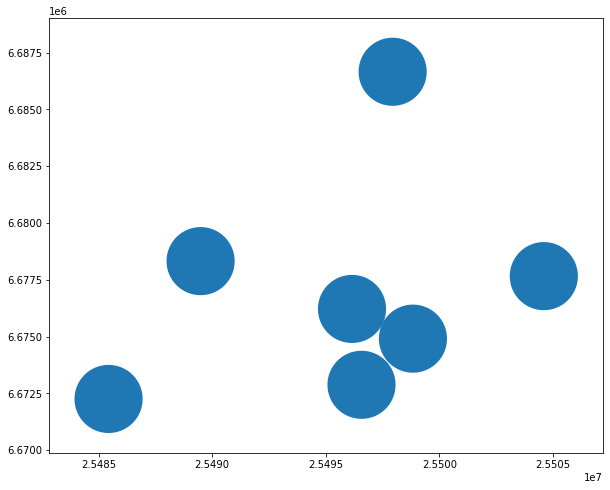

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))  # Create a figure with one subplot
geodata.plot(ax=ax)                         # Plot population grid
#addresses.plot(ax=ax, color='red', markersize=5) # Plot points

## Problem 3: How many people live near shopping centers? (5 points)

Last step in our analysis is to make a spatial join between our buffer layer and population data in order to find out **how many people live near each shopping center**. We will use the same data as we did during [lesson 3](https://automating-gis-processes.github.io/site/notebooks/L3/spatial-join.html#Spatial-join); **a Population Grid** that is available via the HSY wfs. 

Alternatively, you can also download the data from the [Helsinki Region Infoshare (HRI)](https://hri.fi/data/en_GB/dataset/vaestotietoruudukko) on your computer and read it in using geopandas.

The coordinate reference system of the population grid is **ETRS GK-25 (EPSG:3879)**.


**Steps:**

- Read the population grid into a geodataframe

- Select only the useful columns from the population grid: ``'asukkaita'`` (=population count per grid square) and ``'geometry'`` 

- Make a spatial join between your buffered point layer and population grid layer. Join the information now from buffer layer **into the population grid layer**

- Group the joined layer by shopping center index

- Calculate the sum of population living within 1.5 km for each shopping center.

**Finally:**

- Print out the population living within 1.5 km from each shopping center:

     - Itis
     - Forum
     - Iso-omena
     - Sello
     - Jumbo
     - REDI
     - Mall of Tripla
     
**Final print out should contain both the shopping center name and population count**, for example: `25858 people live within 1.5 km from Iso-Omena`.

*Feel free to divide your solution into several codeblocks! Remember to comment your code  :)*

In [35]:
# Read population grid data for 2018 into a variable `pop`. 
# Remember to check the crs info! 
import requests
import geojson
"""
#intento 1: nombre de capa Vaestotietoruudukko_2018

url = 'https://kartta.hsy.fi/geoserver/wfs'
params = dict(service = 'WFS',
             version = '2.0.0',
             request = 'GetFeature',
             typeName = 'Vaestotietoruudukko_2018',
             outputFormat='json')
r=requests.get(url,params=params)
pop = gpd.GeoDataframe.from_features(geojson.loads(r.content))"""

# Specify the url for web feature service

"""
# intento 2: nombre de capa asuminen_ja_maankaytto:Vaestotietoruudukko_2018

url = 'https://kartta.hsy.fi/geoserver/wfs'

# Specify parameters (read data in json format). 
# Available feature types in this particular data source: http://geo.stat.fi/geoserver/vaestoruutu/wfs?service=wfs&version=2.0.0&request=describeFeatureType
params = dict(service='wfs', 
              version='2.0.0', 
              request='GetFeature', 
              typeName='asuminen_ja_maankaytto:Vaestotietoruudukko_2018', 
              outputFormat='json')

# Fetch data from WFS using requests
r = requests.get(url, params=params,verify=False)

# Create GeoDataFrame from geojson
pop = gpd.GeoDataFrame.from_features(geojson.loads(r.content))"""

fp = r"C:\Users\David\Documents\Notebooks\Helsinski_course\Automating_GIS\Lessons\Lesson_3\data\Vaestotietoruudukko.shp"
pop = gpd.read_file(fp)

,index,asukkaita,asvaljyys,ika0_9,ika10_19,ika20_29,ika30_39,ika40_49,ika50_59,ika60_69,ika70_79,ika_yli80,geometry
0,3342.0,108.0,45.0,11.0,23.0,6.0,7.0,26.0,17.0,8.0,6.0,4.0,"POLYGON ((25476499.999 6674248.999, 25476499.9..."
1,3503.0,273.0,35.0,35.0,24.0,52.0,62.0,40.0,26.0,25.0,9.0,0.0,"POLYGON ((25476749.997 6674498.998, 25476749.9..."
2,3660.0,239.0,34.0,46.0,24.0,24.0,45.0,33.0,30.0,25.0,10.0,2.0,"POLYGON ((25476999.994 6675749.004, 25476999.9..."
3,3661.0,202.0,30.0,52.0,37.0,13.0,36.0,43.0,11.0,4.0,3.0,3.0,"POLYGON ((25476999.994 6675499.004, 25476999.9..."
4,3662.0,261.0,30.0,64.0,32.0,36.0,64.0,34.0,20.0,6.0,3.0,2.0,"POLYGON ((25476999.994 6675249.005, 25476999.9..."


In [38]:

pop = pop[['asukkaita','geometry']]
pop = pop.rename(columns={'asukkaita': 'pop18'})

pop.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - 24.5°E to 25.5°E onshore nominal
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [40]:
geodata.crs

<Projected CRS: EPSG:3879>
Name: ETRS89 / GK25FIN
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Finland - 24.5°E to 25.5°E onshore nominal
- bounds: (24.5, 59.94, 25.5, 68.9)
Coordinate Operation:
- name: Finland Gauss-Kruger zone 25
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [39]:
#NON-EDITABLE TEST CELL
# Check your input data
print("Number of rows:", len(pop))
print(pop.head(3))

Number of rows: 3167
   pop18                                           geometry
0  108.0  POLYGON ((25476499.999 6674248.999, 25476499.9...
1  273.0  POLYGON ((25476749.997 6674498.998, 25476749.9...
2  239.0  POLYGON ((25476999.994 6675749.004, 25476999.9...


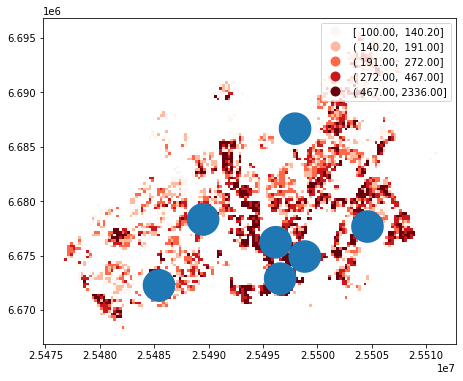

In [41]:
fig, ax = plt.subplots(figsize=(10,6))  # Create a figure with one subplot
pop.plot(ax=ax, column='pop18', cmap="Reds", scheme='quantiles', legend=True);
geodata.plot(ax=ax, legend=True);

In [43]:
# Create a spatial join between grid layer and buffer layer. 
#join_popBuffer = gpd.sjoin(pop,geodata,how='inner', op = 'within')
join_bufferPop = gpd.sjoin(geodata,pop,how='inner', op = 'contains')
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()

In [52]:
join_popBuffer.head(20)

,pop18,geometry,index_right,id,name
403,139.0,"POLYGON ((25484250.000 6672749.004, 25484250.0...",2,2,Iso-omena
404,116.0,"POLYGON ((25484250.000 6672499.005, 25484250.0...",2,2,Iso-omena
422,492.0,"POLYGON ((25484499.998 6672999.003, 25484499.9...",2,2,Iso-omena
423,114.0,"POLYGON ((25484499.998 6672749.004, 25484499.9...",2,2,Iso-omena
424,128.0,"POLYGON ((25484499.998 6672499.005, 25484499.9...",2,2,Iso-omena
425,241.0,"POLYGON ((25484499.998 6671998.997, 25484499.9...",2,2,Iso-omena
426,305.0,"POLYGON ((25484499.998 6671748.997, 25484499.9...",2,2,Iso-omena
440,732.0,"POLYGON ((25484749.995 6673249.002, 25484749.9...",2,2,Iso-omena
441,825.0,"POLYGON ((25484749.995 6672999.003, 25484749.9...",2,2,Iso-omena
442,513.0,"POLYGON ((25484749.995 6672749.004, 25484749.9...",2,2,Iso-omena


In [50]:
#type(join_popBuffer)

geopandas.geodataframe.GeoDataFrame

In [53]:
join_bufferPop.head(20)

,id,name,geometry,index_right,pop18
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2718,176.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2757,156.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2791,155.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2829,147.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2868,147.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2717,889.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2756,263.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2790,173.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2867,186.0
0,0,Itis,"POLYGON ((25506098.602 6677662.109, 25506091.3...",2828,137.0


In [48]:
type(join_bufferPop)

geopandas.geodataframe.GeoDataFrame

In [ ]:
# Report how many people live within 1.5 km distance from each shopping center

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
#raise NotImplementedError()

In [74]:
import numpy as np
conteo = join_bufferPop.groupby('id').agg({'pop18':np.sum})
#join_bufferPop.groupby('id').sum()
#conteo 
conteo = conteo.merge(data, on='id', how='inner')
conteo = conteo[['id','name','pop18']]
conteo.head(10)

,id,name,pop18
0,0,Itis,19930.0
1,1,Forum,56394.0
2,2,Iso-omena,26694.0
3,3,Sello,20191.0
4,4,Jumbo,10317.0
5,5,REDI,24540.0
6,6,Mall of Tripla,20714.0


In [71]:
type(conteo)

pandas.core.frame.DataFrame

**Reflections:**
    
- How challenging did you find problems 1-3 (on scale to 1-5), and why?
- What was easy?
- What was difficult?

YOUR ANSWER HERE

Well done! Now you can continue to [problem 4](Exercise-3-Problem-4.ipynb)